# Using synth3 synthetic spectra

In [1]:
import VPtools as vp
import matplotlib.pyplot as plt

path_google='G:/Shared drives/'

## 1. How to access the synthetic spectra

The synth3 software was designed by Oleg Kochukhov (see: https://ui.adsabs.harvard.edu/abs/2012ascl.soft12010K/abstract) to calculate normalized synthetic spectra from VALD line lists and Kurucz format model atmospheres. Oleg later gave us a "hack" to have synth3 output continuum spectra. 

We have a set of precomputed synth3 spectra (and continuum spectra) on the ResearchGroupResources Google Drive at ReferenceMaterial/synth3

NOTE: The Kurucz atmosphere models and VALD line lists are not highly accurate at temperatures above 15000 K


We have a csv table on the google drive, that lists all of the models we have calculated so far.

In [2]:
table = vp.synth3.get_table_synth3()
display(table)

,ModelCode,Teff,log(g),vsini,vmicro,vmac,depth cutoff,wl start air [nm],wl stop air [nm],R
0,T31000G40,31000,4.0,0,2,2,0.01,370,900,65000
1,T30000G40,30000,4.0,0,2,2,0.01,370,900,65000
2,T29000G40,29000,4.0,0,2,2,0.01,370,900,65000
3,T28000G40,28000,4.0,0,2,2,0.01,370,900,65000
4,T28000G35,28000,3.5,0,2,2,0.01,370,900,65000
...,...,...,...,...,...,...,...,...,...,...
61,T07500G40,7500,4.0,0,2,2,0.01,370,900,65000
62,T07500G35,7500,3.5,0,2,2,0.01,370,900,65000
63,T07000G45,7000,4.5,0,2,2,0.01,370,900,65000
64,T07000G40,7000,4.0,0,2,2,0.01,370,900,65000


The column "ModelCode" gives the root of the file name. This is simply the temperature and logg*10 of the model.

We have also included a template to access the files.

In [3]:
print(vp.synth3.synth3_path_name)

ResearchGroupResources-Files/ReferenceMaterial/synth3/0vsiniSpec/T{0}G{1}


Using the `format` function you can pass the template a temperature and logg to obtain the file path

In [6]:
my_model_name = vp.synth3.synth3_path_name.format('12000','40')

## 2. How to read in a synthetic spectum

We can read in the synthetic spectra by using the `read` function and passing the model name above.

In [7]:
spec_norm, spec_con = vp.synth3.read(path_google+my_model_name)

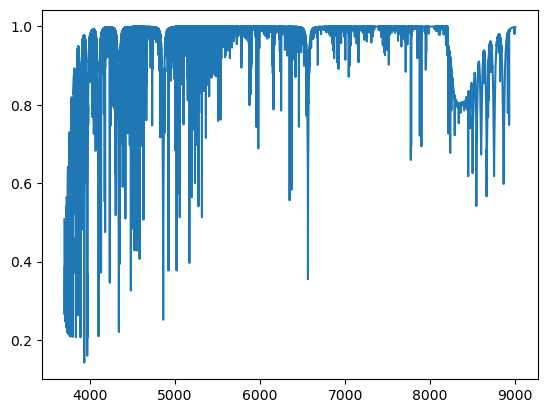

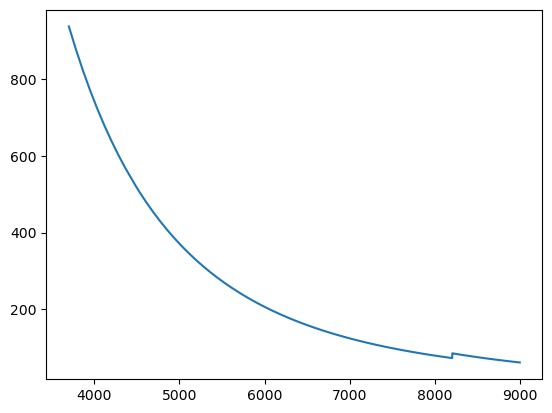

In [8]:
fig, ax = plt.subplots(1,1)
ax.plot(spec_norm.wl, spec_norm.specI)

fig, ax = plt.subplots(1,1)
ax.plot(spec_con.wl, spec_con.specI)
